> # *Crop Recommendation Analysis*

## Import Modules required

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [5]:
# load dataset and take overview

dataset = pd.read_csv("../Datasets/Crop_Recommendation_Dataset.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# View basic information related to dataset 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2206 non-null   int64  
 1   P            2206 non-null   int64  
 2   K            2206 non-null   int64  
 3   temperature  2203 non-null   float64
 4   humidity     2206 non-null   float64
 5   ph           2203 non-null   float64
 6   rainfall     2202 non-null   float64
 7   label        2206 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 138.0+ KB


## Data Cleaning

In [7]:
# find duplicate rows 

series = dataset.duplicated()
series[series == True]

105     True
176     True
274     True
874     True
1390    True
dtype: bool

In [8]:
# View duplicate rows 

dataset.loc[[105,176,274,874,1390]]

,N,P,K,temperature,humidity,ph,rainfall,label
105,82,43,38,23.286172,81.433216,5.105588,242.317063,rice
176,95,38,22,19.849394,61.245001,5.730617,100.768925,maize
274,22,67,78,17.166064,14.424575,6.204091,72.326675,chickpea
874,33,59,19,23.193053,62.747108,7.641024,49.552133,lentil
1390,92,7,45,26.706078,81.141495,6.944640,51.510336,watermelon


In [9]:
# Remove duplicate rows

dataset.drop([105,176,274,874,1390],axis=0,inplace=True)

In [10]:
# count of duplicate rows to cross check that all duplicates has been removed

dataset.duplicated().sum()

0

In [11]:
# count of null values in every column

col = dataset.columns
col = list(col)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

N => 0
P => 0
K => 0
temperature => 3
humidity => 0
ph => 3
rainfall => 4
label => 0


In [12]:
# Drop all rows where any value is null, As number of rows are not much so we can drop them

dataset.dropna(inplace=True)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

N => 0
P => 0
K => 0
temperature => 0
humidity => 0
ph => 0
rainfall => 0
label => 0


## Data Exploration And Visualization

In [13]:
# View columns present

list(dataset.columns)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [14]:
# Find crops that are present as label

unique_crops =  dataset['label'].unique()
unique_crops = list(unique_crops)

unique_crops


['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [15]:
# Find count of datapoints for every crop

dataset['label'].value_counts()

label
rice           100
banana         100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
muskmelon      100
grapes         100
maize          100
mango          100
pomegranate    100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
apple           98
lentil          97
watermelon      96
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

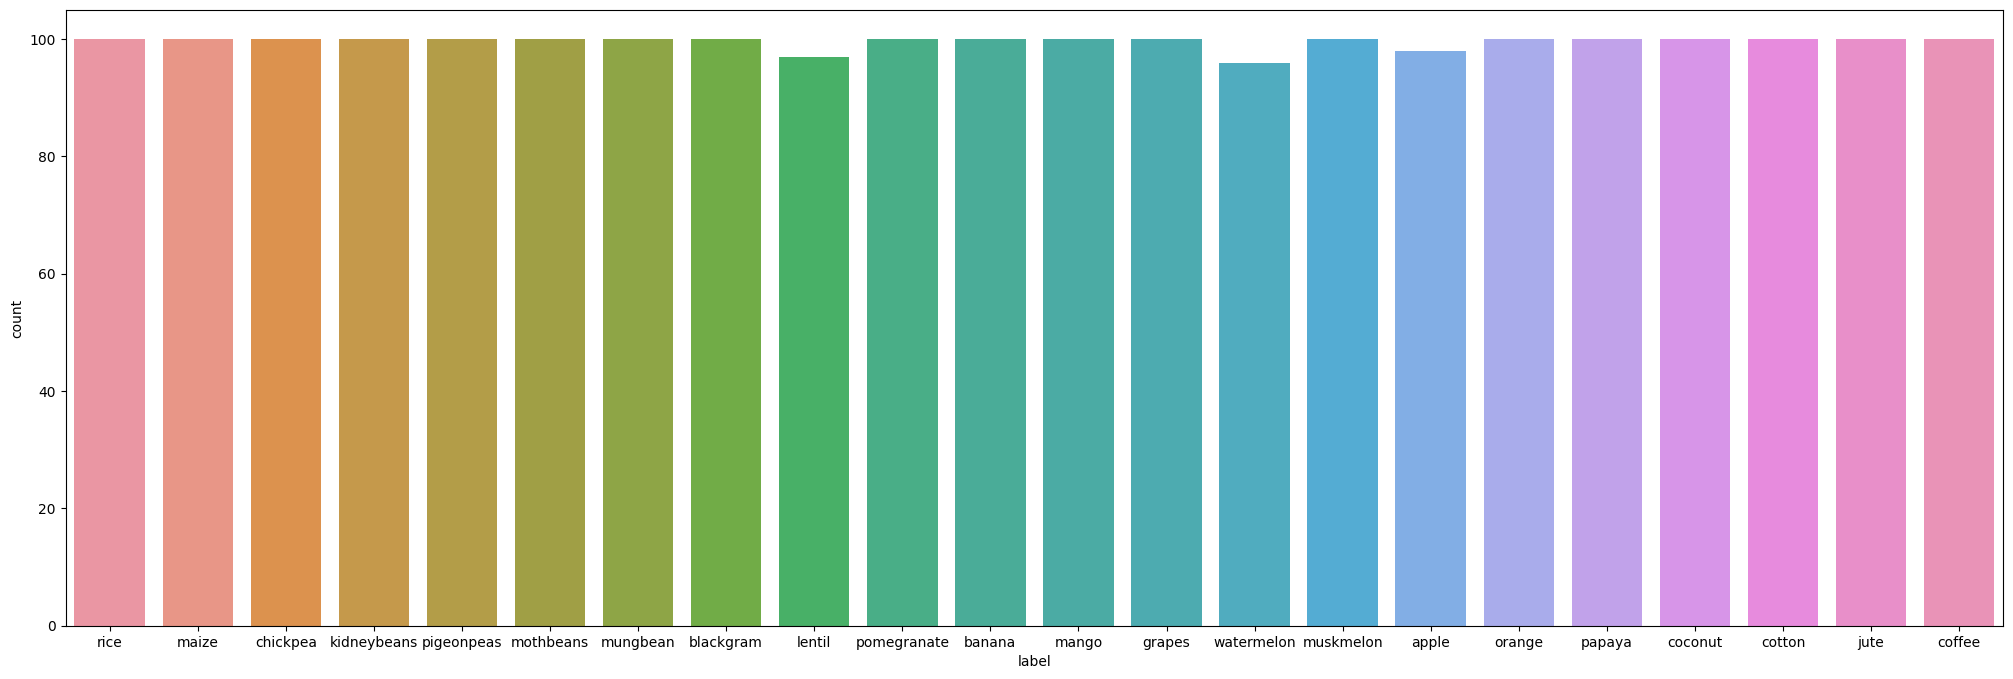

In [16]:
# plot counts of crop

plt.figure(figsize=(25,8))

sns.countplot(data=dataset,x='label')

<Axes: xlabel='Nitrogen', ylabel='Crop'>

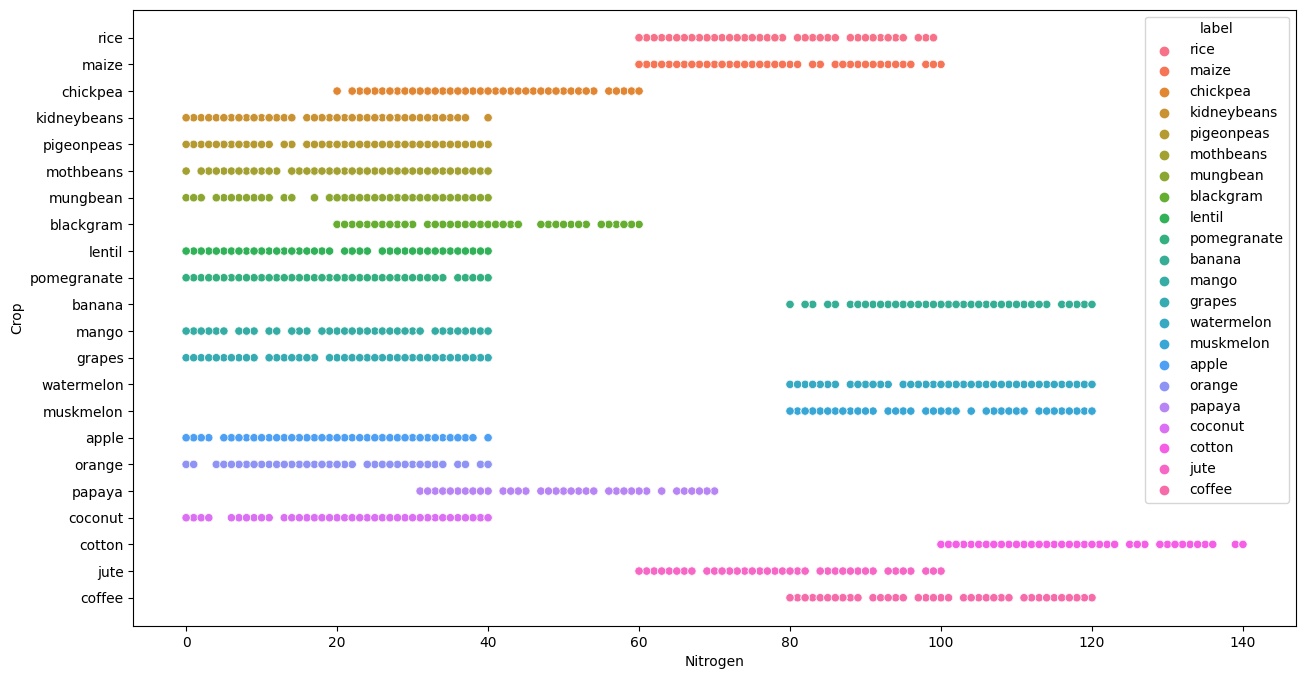

In [17]:
# effect of Nitrogen on crop

plt.figure(figsize=(15,8))
plt.axes(xlabel="Nitrogen", ylabel="Crop")
sns.scatterplot(data=dataset, x='N', y='label', hue='label')

<Axes: xlabel='Phosphorus', ylabel='Crop'>

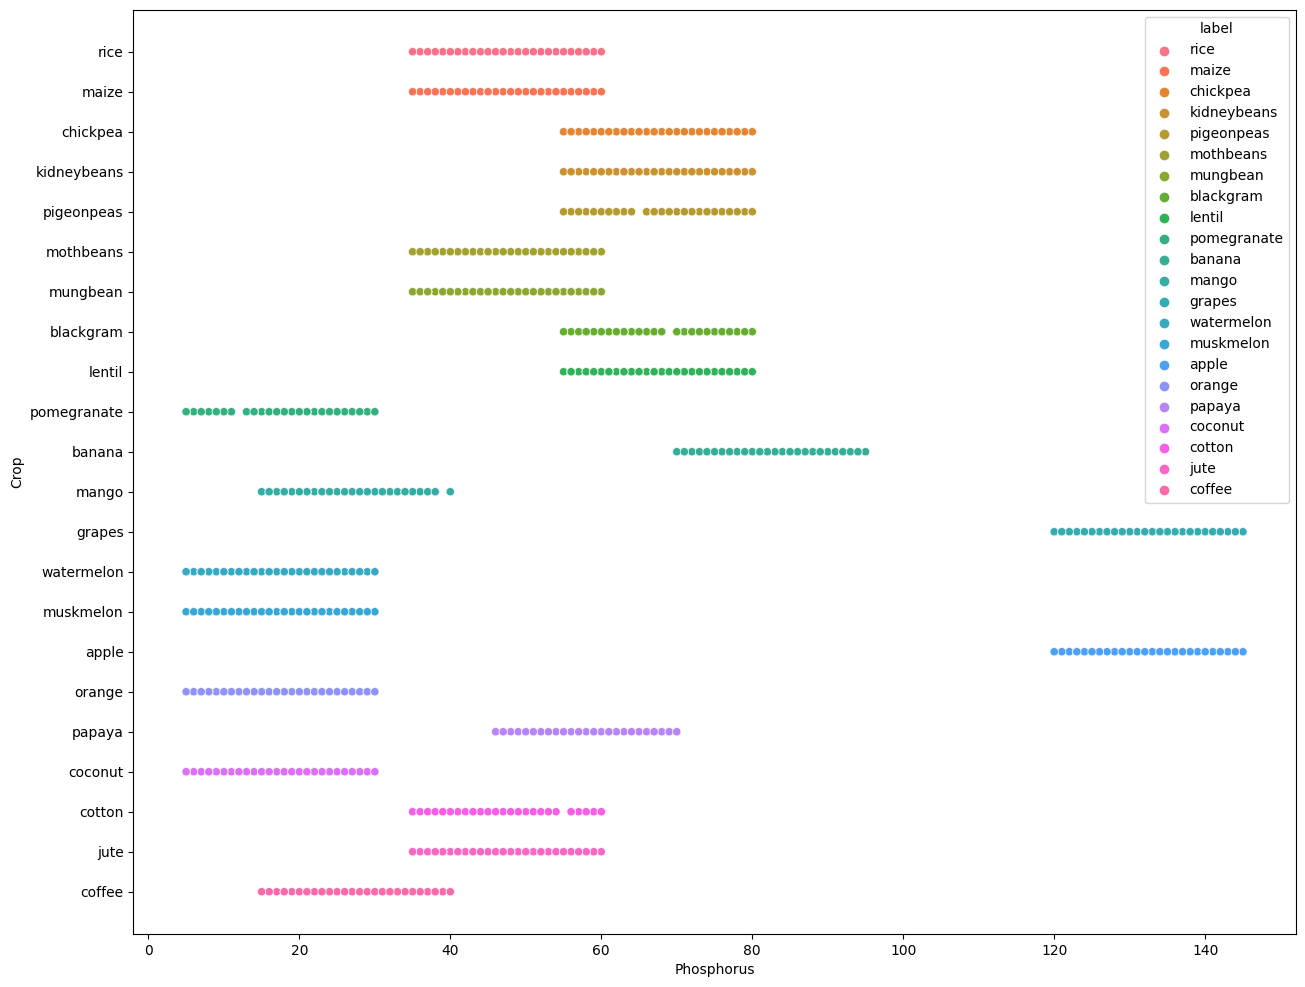

In [18]:
# effect of Phosphorus on crop

plt.figure(figsize=(15,12))
plt.axes(xlabel="Phosphorus", ylabel="Crop")
sns.scatterplot(data=dataset, x='P', y='label', hue='label')

<Axes: xlabel='Potassium', ylabel='Crop'>

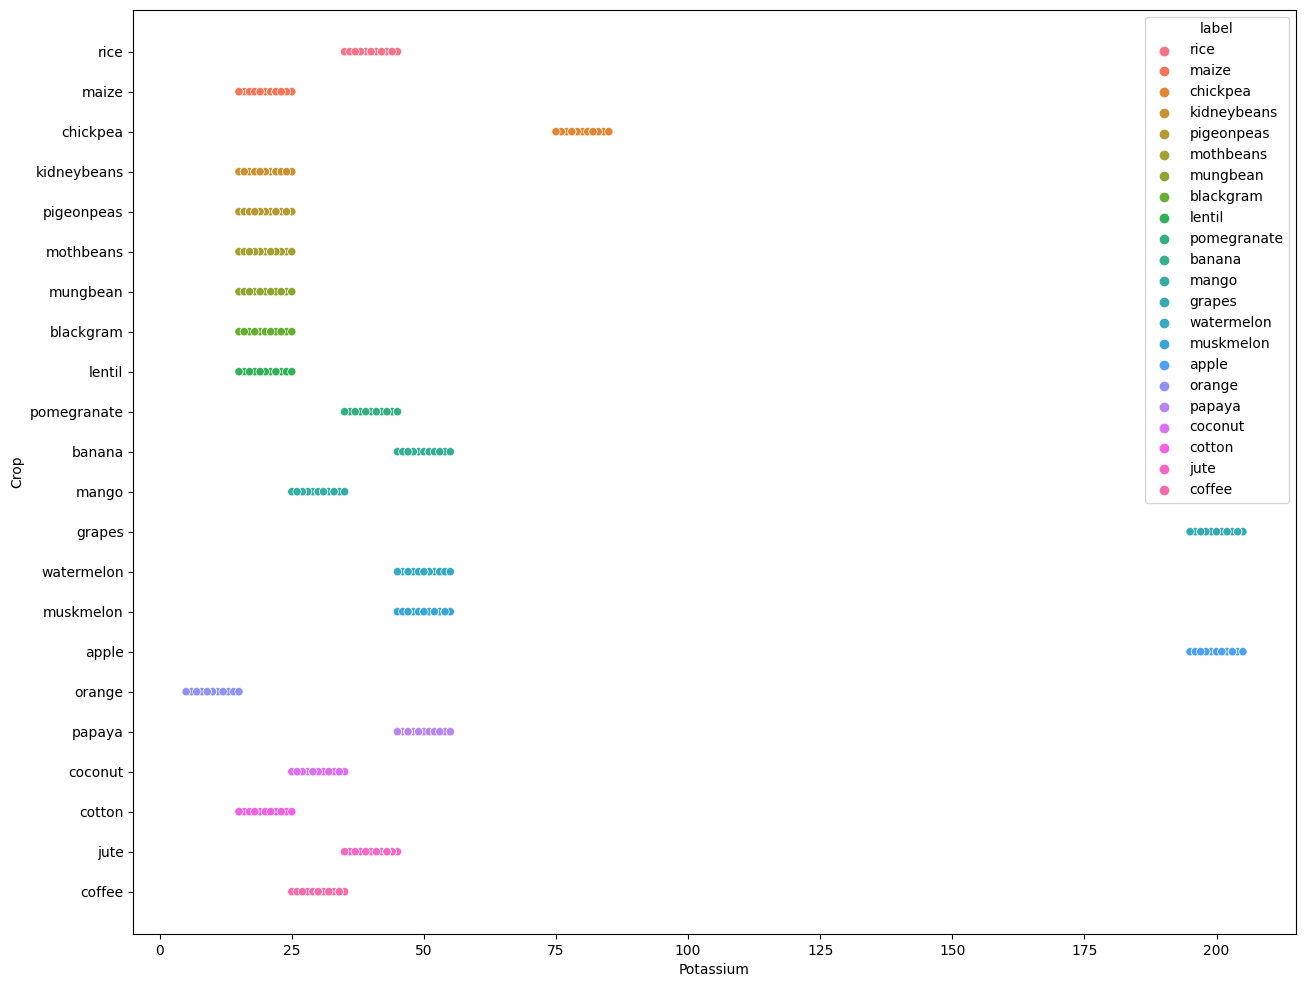

In [19]:
# effect of Potassium on crop

plt.figure(figsize=(15,12))
plt.axes(xlabel="Potassium", ylabel="Crop")
sns.scatterplot(data=dataset, x='K', y='label', hue='label')

<Axes: xlabel='Temperature', ylabel='Crop'>

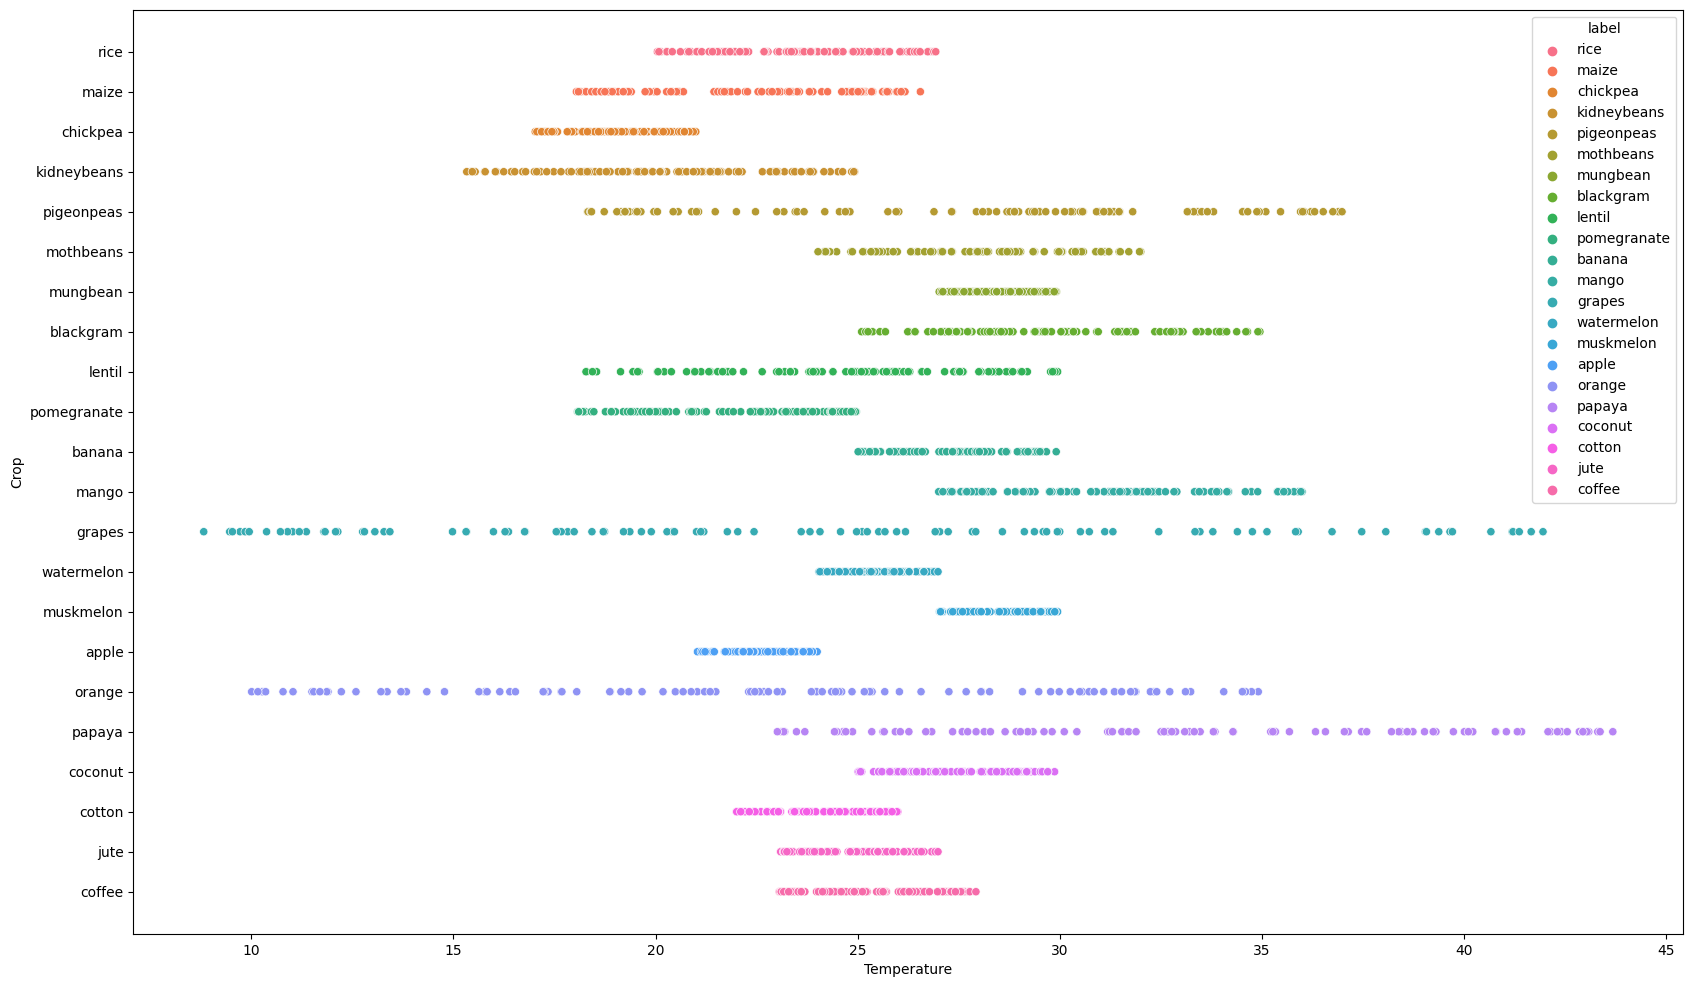

In [20]:
# effect of temperature on crop

plt.figure(figsize=(20,12))
plt.axes(xlabel="Temperature", ylabel="Crop")
sns.scatterplot(data=dataset, x='temperature', y='label', hue='label')

<Axes: xlabel='humidity', ylabel='Crop'>

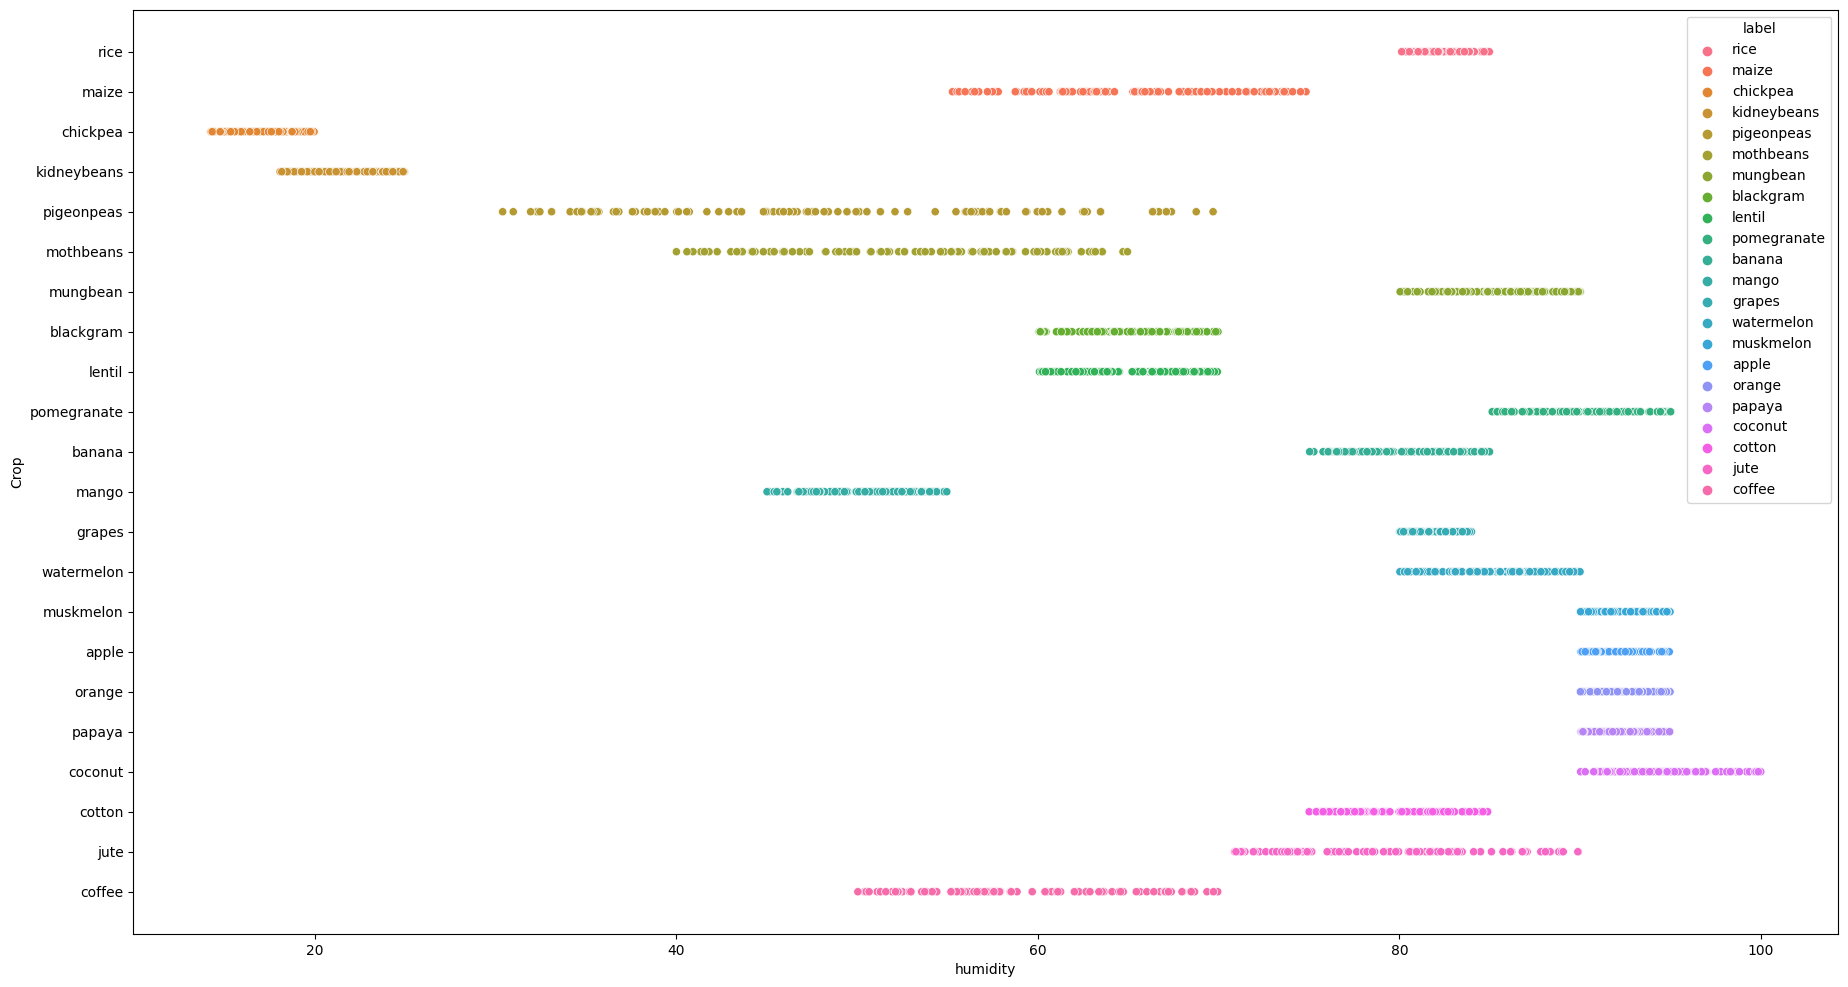

In [21]:
# effect of humidity on crop

plt.figure(figsize=(22,12))
plt.axes(xlabel="humidity", ylabel="Crop")
sns.scatterplot(data=dataset, x='humidity', y='label', hue='label')

<Axes: xlabel='ph', ylabel='Crop'>

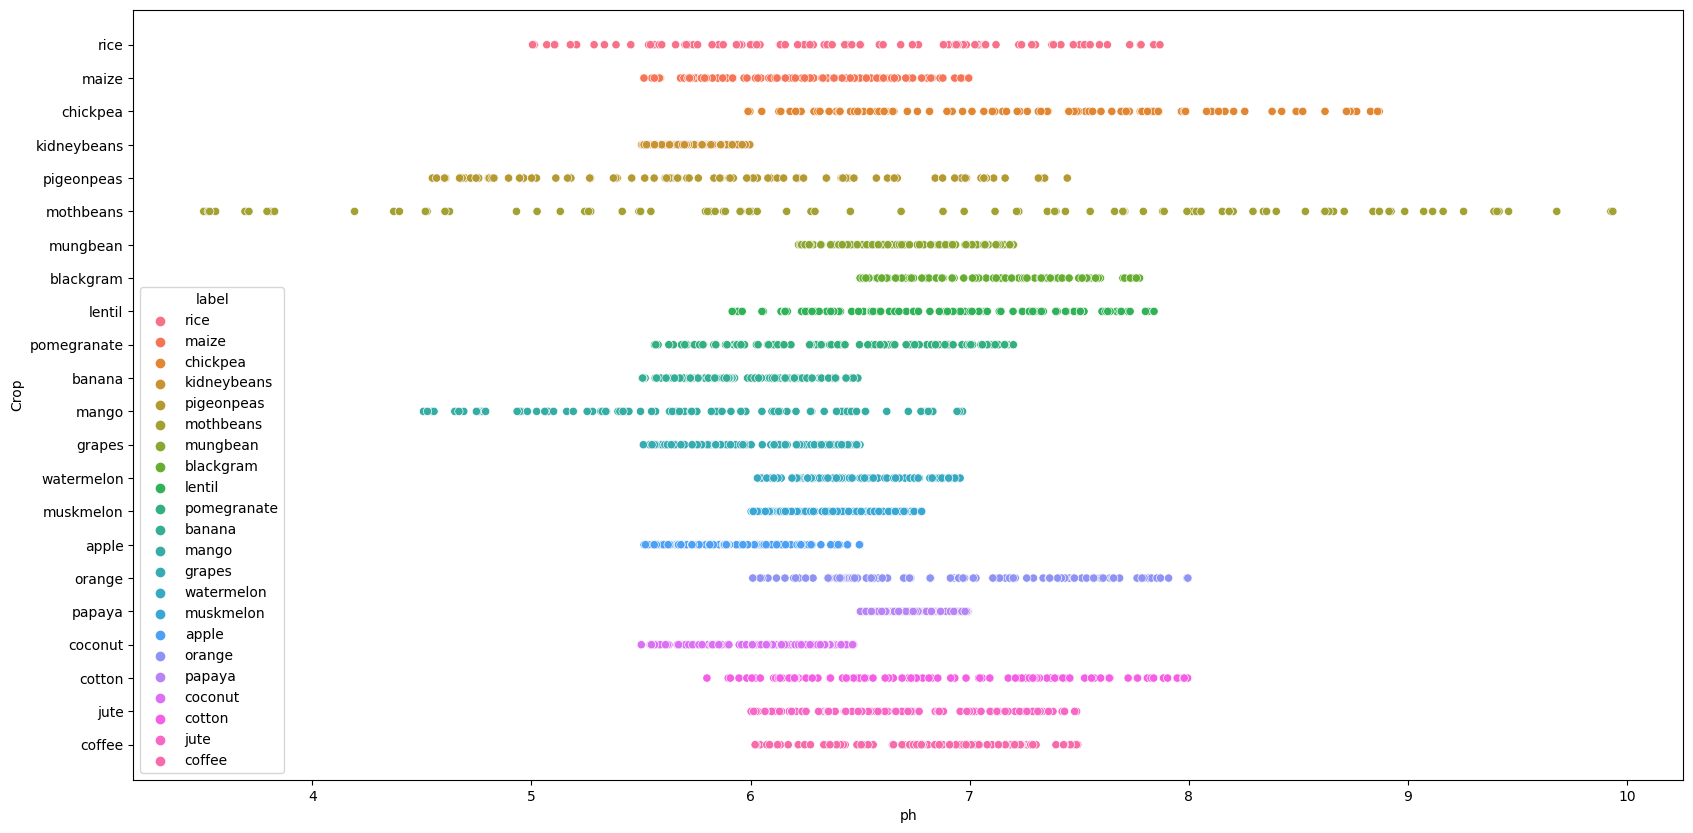

In [22]:
# effect of ph on crop

plt.figure(figsize=(20,10))
plt.axes(xlabel="ph", ylabel="Crop")
sns.scatterplot(data=dataset, x='ph', y='label', hue='label')

<Axes: xlabel='Rainfall', ylabel='Crop'>

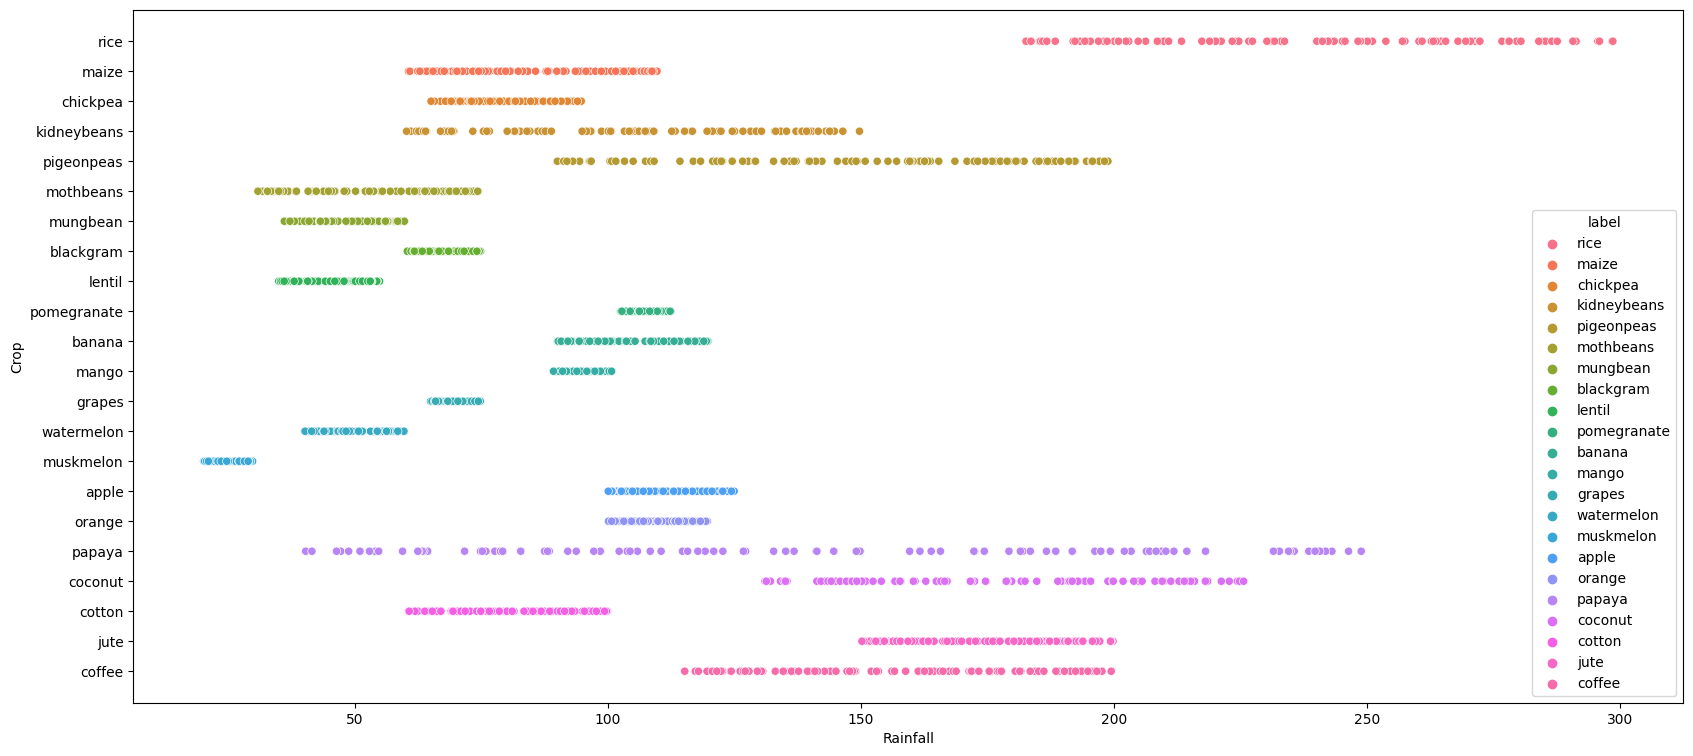

In [23]:
# effect of rainfall on crop

plt.figure(figsize=(20,9))
plt.axes(xlabel="Rainfall", ylabel="Crop")
sns.scatterplot(data=dataset, x='rainfall', y='label', hue='label')

## Data Transformation

In [24]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2201,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2202,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2203,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2204,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [25]:
# Transform label from string to integer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
dataset['label'] = label_encoder.fit_transform(dataset['label'])

dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2201,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2202,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2203,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2204,117,32,34,26.272418,52.127394,6.758793,127.175293,5


## Data Analysis

In [26]:
# View basic analysis of columns 

dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,50.533090,53.353263,48.042903,25.625484,71.446780,6.469614,103.626322,10.491100
std,36.891717,32.941976,50.522611,5.067714,22.289889,0.774730,54.980721,6.334928
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.774665,60.197391,5.970895,64.752243,5.000000
50%,37.000000,51.000000,32.000000,25.609734,80.458463,6.425420,95.048716,11.000000
75%,84.000000,68.000000,48.500000,28.568206,89.960531,6.924267,124.440907,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [27]:
# find correlation matrix

corr_matrix = dataset.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.227555,-0.139505,0.025056,0.190133,0.096701,0.060835,-0.037141
P,-0.227555,1.000000,0.736684,-0.126411,-0.119317,-0.137706,-0.066186,-0.487755
K,-0.139505,0.736684,1.000000,-0.160028,0.188996,-0.168414,-0.055219,-0.344927
temperature,0.025056,-0.126411,-0.160028,1.000000,0.205954,-0.019002,-0.031096,0.113083
humidity,0.190133,-0.119317,0.188996,0.205954,1.000000,-0.007778,0.095139,0.194082
ph,0.096701,-0.137706,-0.168414,-0.019002,-0.007778,1.000000,-0.108668,-0.013217
rainfall,0.060835,-0.066186,-0.055219,-0.031096,0.095139,-0.108668,1.000000,0.049036
label,-0.037141,-0.487755,-0.344927,0.113083,0.194082,-0.013217,0.049036,1.000000


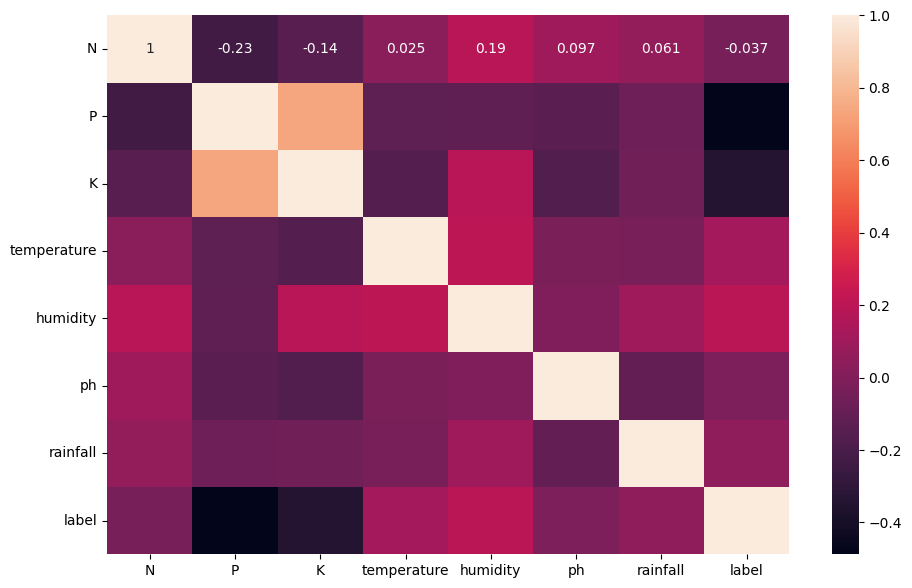

In [28]:
# plotting the heatmap for correlation matrix


plt.figure(figsize=(11, 7))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [ ]:
X = dataset.drop('label',axis=1)
Y = dataset['label']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)